In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

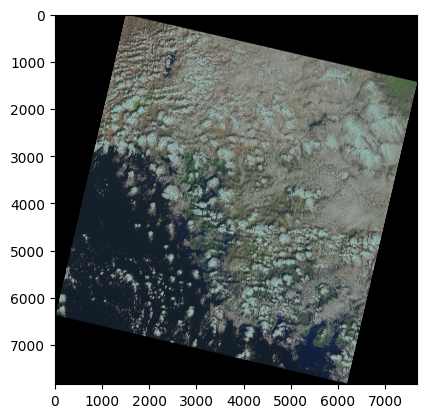

In [2]:
img = cv2.cvtColor(cv2.imread('img/LC08_L1TP_152043_20211223_20211230_01_T2.TIF'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [5]:
img.shape

(7831, 7681, 3)

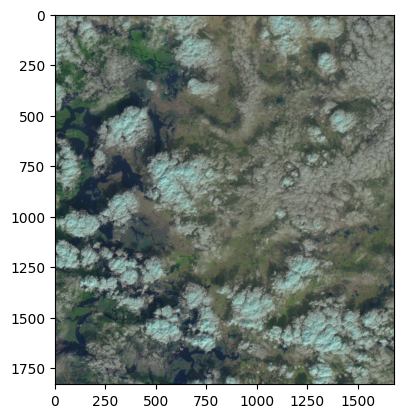

In [30]:
#image[start_x:end_x, start_y:end_y] for cropping.
crop_size = 3000
crop_image = img[0 + crop_size : 7831 - crop_size , 0 + crop_size : 7681 - crop_size]
plt.imshow(crop_image)
plt.show()

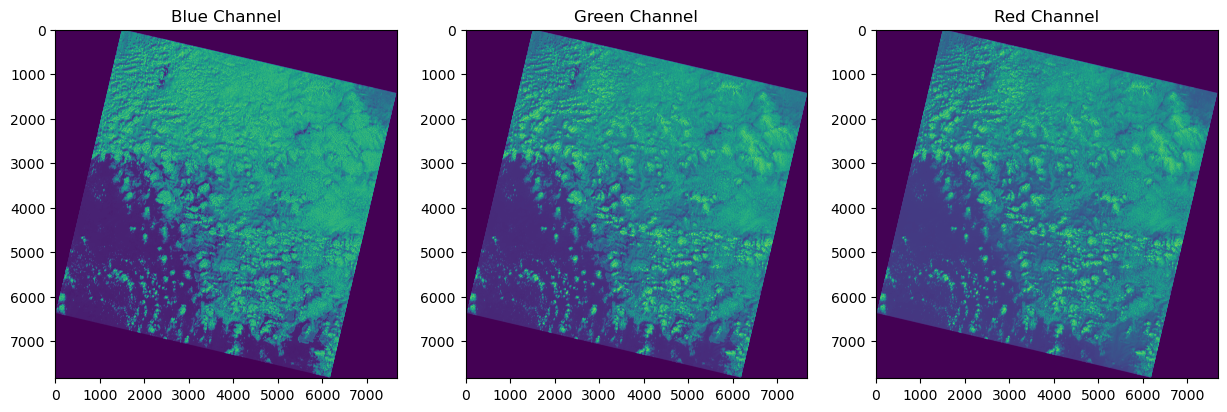

In [9]:
# Splitting into channels
# Divides a multi-channel array into several single-channel arrays.
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [28]:
# printing dataFrame for blue channel
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df[1000][3000: 3010]

3000    35
3001    34
3002    34
3003    34
3004    34
3005    31
3006    27
3007    23
3008    23
3009    23
Name: 1000, dtype: uint8

In [29]:
# normalizing:
# dividing the data of all channels by 255 so that the data is scaled between 0 and 1
df_blue = blue/255
df_green = green/255
df_red = red/255

In [31]:
# specifying the number of components to keep
components = 100

# Create an instance of PCA class
pca_b = PCA(n_components=components)
pca_g = PCA(n_components=components)
pca_r = PCA(n_components=components)

# Assigning the dataset to which the dimensionality reduction should be applied
pca_b.fit(df_blue)
pca_g.fit(df_green)
pca_r.fit(df_red)

# the transform function applies the reduction
trans_pca_b = pca_b.transform(df_blue)
trans_pca_g = pca_g.transform(df_green)
trans_pca_r = pca_r.transform(df_red)

In [32]:
# shape after applying dimensionality reduction
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(7831, 100)
(7831, 100)
(7831, 100)


In [42]:
# 'explained_variance_ratio_' returns an array of variance explained by each component/dimension
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9338139006680151
Green Channel: 0.9405200000696607
Red Channel  : 0.9367389910890191


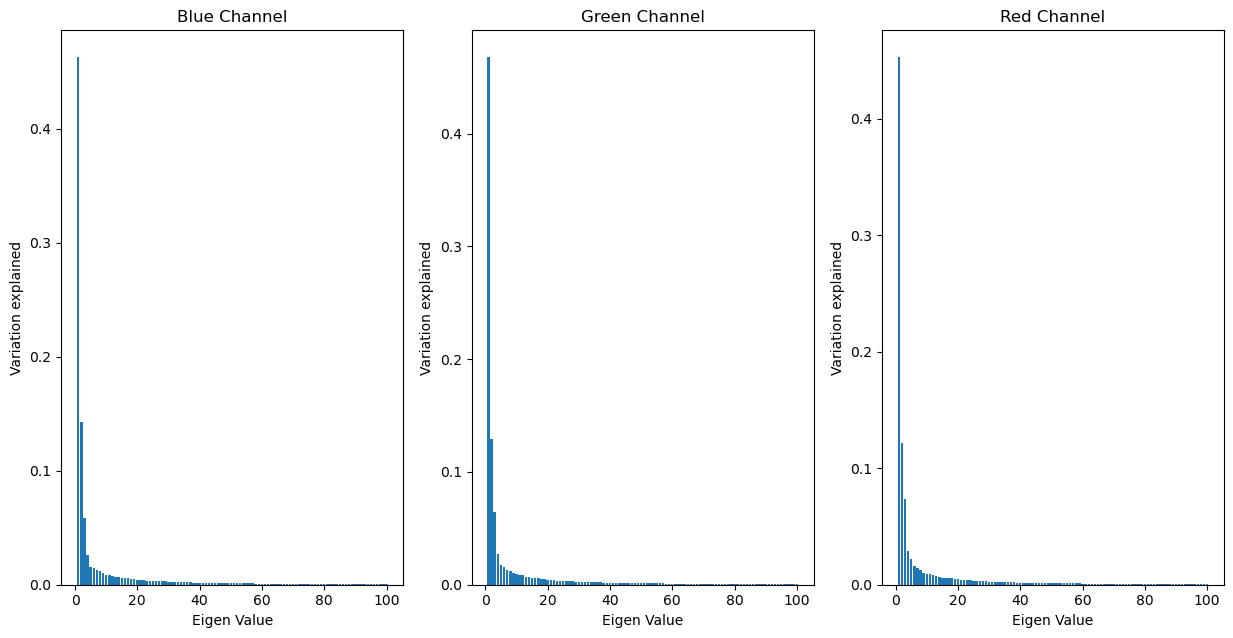

In [43]:
# plotting bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,components+1)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,components+1)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,components+1)),pca_r.explained_variance_ratio_)
plt.show()

In [45]:
# re-transforming the data back to its 'shape'
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(7831, 7681) (7831, 7681) (7831, 7681)


In [46]:
# Creates one multichannel array out of several single-channel ones.
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(7831, 7681, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


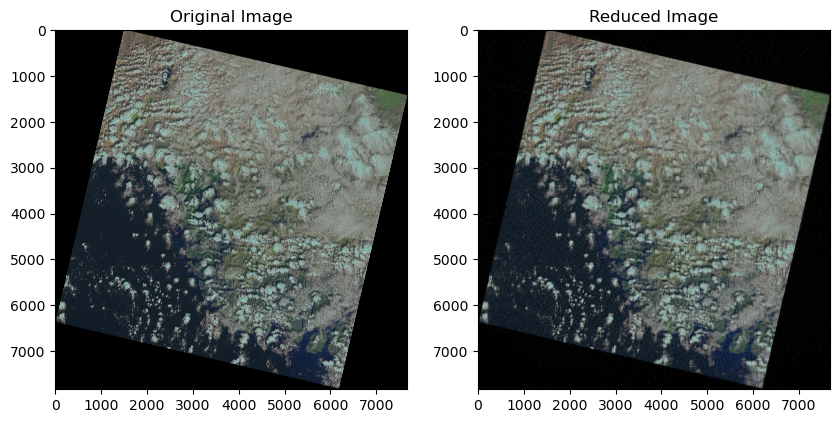

In [48]:
# plotting the orignal and the re-transformed data
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()